# Breakout: data mining the LINEAR catalog

In this breakout we'll explore unsupervised clustering and anomaly detection in variable sources from the LINEAR survey.
This is similar to part of the analysis done in [this paper](http://adsabs.harvard.edu/abs/2013AJ....146..101P) (see also [this astroML example](http://www.astroml.org/book_figures/chapter10/fig_LINEAR_clustering.html)).

We'll start with our standard imports, then take a look at the data:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
# If this causes an error, you can comment it out.
import seaborn as sns
sns.set()

## Looking at the LINEAR data

First we will download the data with astroML. This data is a set of variable sources from the LINEAR survey: we have both photometry (*u-g*, *g-i*, *i-K*, *J-K* colors) and light-curve measurements (*logP*, *amplitude*, and *skew*).

### LINEAR catalog
We have two views of the data. The first is a catalog derived from the light curves:

In [2]:
from astroML.datasets import fetch_LINEAR_geneva

data = fetch_LINEAR_geneva()

The data is in the form of a record array. That is, each item of the data is a compound object containing multiple values:

In [3]:
print(data.shape)

(6146,)


In [4]:
data[0]

(119.526443, 46.96212, 1.166, 0.369, 1.018, 0.269, -0.2541378, 0.619, -0.313, -0.567, 16.37, 301, 1, 29848)

To learn what is in the data, we can look at the names from the data type

In [5]:
print(data.dtype.names)

('ra', 'dec', 'ug', 'gi', 'iK', 'JK', 'logP', 'Ampl', 'skew', 'kurt', 'magMed', 'nObs', 'LCtype', 'LINEARobjectID')


Any individual column of values can be found with the item getter interface.
For example, to get an array of all the RA values we can write:

In [6]:
data['ra']

array([119.526443, 119.324013, 118.503448, ..., 168.818787, 169.745926,
       168.388199])

If we want to do some learning on this data, we need to put it in the form of a matrix.
For example, we can choose the following features and construct the matrix this way:

In [7]:
feature_names = ['ug', 'gi', 'iK', 'JK', 'logP', 'Ampl', 'skew']
X = np.vstack([data[f] for f in feature_names]).T
X.shape

(6146, 7)

The object ID is also available, if you'd like to refer back to the raw LINEAR data

In [8]:
data['LINEARobjectID']

array([   29848,    32086,    43542, ..., 24215207, 24264418, 24265735])

### raw LINEAR data

The second set available is the raw LINEAR light curve data

In [9]:
from astroML.datasets import fetch_LINEAR_sample
lightcurves = fetch_LINEAR_sample()

In [10]:
print(lightcurves)

The result is an object which contains references to all the LINEAR data; if we're interested in any individual light curve, we can access it via the ID:

In [11]:
lc = lightcurves.get_light_curve(10003298)
lc.shape

(196, 3)

This light curve has 196 observations, and the columns are [time, magnitude, mag_error].
One shortcut to access this data is to transpose the array:

In [12]:
t, y, dy = lc.T

We can now plot this data:

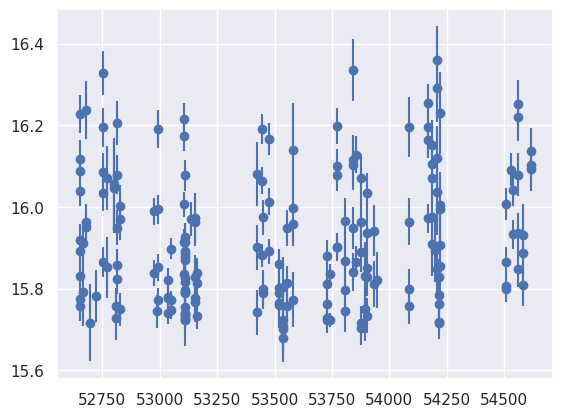

In [13]:
plt.errorbar(t, y, dy, fmt='o');

### Linking the Catalogs and Raw Data

The catalogs and raw data are linked by the LINEAR ID:

In [14]:
lc_index = 20
lc_id = data['LINEARobjectID'][lc_index]
lc_id

186102

In [15]:
lc = lightcurves.get_light_curve(int(lc_id))
t, y, dy = lc.T

Then we can plot a phased lightcurve using the best-fit period, e.g.

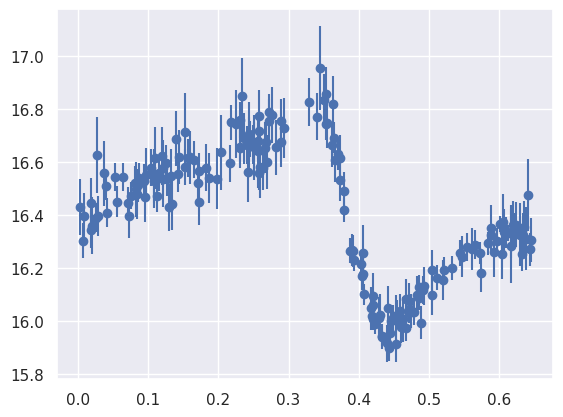

In [16]:
P = 10 ** data['logP'][lc_index]
phase = t % P
plt.errorbar(phase, y, dy, fmt='o');

## Exploring the data

This exercise is very free-form, but here are some suggestions for how to proceed with exploring this data:

1. **Using Principal Component Analysis:**

   A. How many dimensions are needed to represent the data?
   
   B. Which objects are not well-approximated by this representation?
   
   C. Can you find any clusters in the data by-eye?
   
2. **Using GMM:**

   A. How many clusters best-fit the data? (you can use BIC, AIC, or some other method)
   
   B. Does the best-fit GMM model show any outliers in the data? Are these "real" outliers or artifacts?
   
   C. Do any of these clusters dominate (i.e. small covariance, large weight, etc.)? Can you come up with a good visualization to convey information about which point belongs to which cluster?
   
The purpose of this exercise is not necessarily to answer these questions, but to spend time using the tools we've learned on some **real** data, so you can see just how messy the process of data mining is! (And hey, if you find something interesting, maybe you should write a quick paper about it!) Good luck!